{'categories': [{'name': 'others_', 'score': 0.1953125}, {'name': 'outdoor_', 'score': 0.00390625, 'detail': {'landmarks': []}}], 'color': {'dominantColorForeground': 'White', 'dominantColorBackground': 'Black', 'dominantColors': ['Black', 'White'], 'accentColor': '9D742E', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['indoor', 'person', 'table', 'sitting', 'bottle', 'food', 'man', 'computer', 'people', 'laptop', 'standing', 'drinking', 'woman', 'plate', 'filled', 'desk', 'wine', 'large', 'group', 'holding', 'pizza', 'game', 'white', 'room', 'counter'], 'captions': [{'text': 'a group of people sitting at a table', 'confidence': 0.7581890295772351}]}, 'requestId': '01ac5ff6-c17b-4eb1-8101-3d4a3ad019b4', 'metadata': {'width': 4032, 'height': 3024, 'format': 'Jpeg'}}


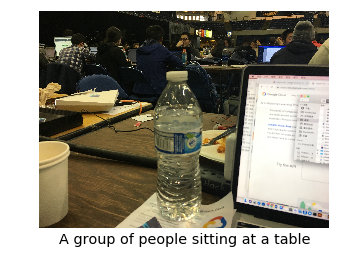

In [2]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "d6483d377e8d4711afe655aa54311b9f"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

analyze_url = vision_base_url + "analyze"

# Set image_path to the local path of an image that you want to analyze.
image_path = "/Users/lijh/Desktop/WechatIMG1105.jpeg"

# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key,
              'Content-Type': 'application/octet-stream'}
params     = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)